<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Image-Classifiers---Part-Six" data-toc-modified-id="Image-Classifiers---Part-Six-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Image Classifiers - Part Six</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction</a></span></li></ul></li><li><span><a href="#Install-TensorFlow-and-Keras" data-toc-modified-id="Install-TensorFlow-and-Keras-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Install TensorFlow and Keras</a></span></li><li><span><a href="#Model-discussion" data-toc-modified-id="Model-discussion-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model discussion</a></span><ul class="toc-item"><li><span><a href="#Architecture" data-toc-modified-id="Architecture-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Architecture</a></span></li><li><span><a href="#Filters" data-toc-modified-id="Filters-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Filters</a></span></li><li><span><a href="#Pooling" data-toc-modified-id="Pooling-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Pooling</a></span></li><li><span><a href="#Flattening-and-dense-layers" data-toc-modified-id="Flattening-and-dense-layers-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Flattening and dense layers</a></span></li><li><span><a href="#Dropout" data-toc-modified-id="Dropout-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Dropout</a></span></li></ul></li><li><span><a href="#Develop-the-model" data-toc-modified-id="Develop-the-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Develop the model</a></span><ul class="toc-item"><li><span><a href="#Import-libraries-and-data-sets" data-toc-modified-id="Import-libraries-and-data-sets-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Import libraries and data sets</a></span></li><li><span><a href="#Inspect-the-data" data-toc-modified-id="Inspect-the-data-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Inspect the data</a></span></li><li><span><a href="#Extract-images-from-archive" data-toc-modified-id="Extract-images-from-archive-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Extract images from archive</a></span></li><li><span><a href="#Build-and-compile-the-model" data-toc-modified-id="Build-and-compile-the-model-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Build and compile the model</a></span></li><li><span><a href="#Model-Summary" data-toc-modified-id="Model-Summary-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Model Summary</a></span></li><li><span><a href="#Load-the-image-data" data-toc-modified-id="Load-the-image-data-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Load the image data</a></span></li><li><span><a href="#Train-the-model" data-toc-modified-id="Train-the-model-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Train the model</a></span></li><li><span><a href="#Examine-the-training-results" data-toc-modified-id="Examine-the-training-results-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Examine the training results</a></span></li><li><span><a href="#Make-predictions-and-gauge-test-set-accuracy" data-toc-modified-id="Make-predictions-and-gauge-test-set-accuracy-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>Make predictions and gauge test set accuracy</a></span></li><li><span><a href="#Examine-misclassifications" data-toc-modified-id="Examine-misclassifications-4.10"><span class="toc-item-num">4.10&nbsp;&nbsp;</span>Examine misclassifications</a></span></li></ul></li></ul></div>

<h1 style="text-align: center;">Image Classifiers - Part Six</h1>

## Introduction

<img style="float: left; margin-right: 25px;" src="images/catMonocle.jpg" />

The overall goal of this series of write-ups is to explore a number of models performing binary classification on a given set of images.  In this sixth write-up we move from creating models from scratch to utilizing the TensorFlow framework.  

The goal of this write-up is to emulate what we've done in the [most recent from scratch model](https://nbviewer.jupyter.org/github/nrasch/Portfolio/blob/master/Machine-Learning/Python/03-ComputerVision-Classification/Classification-04.ipynb) utilizing TensorFlow, achieve at least the same performance and results as we had before, and pave the way to continue work in TensorFlow and Keras.  The end result should be a convolutional neural network (CNN) in Keras that that will serve as our baseline.

So, let's get started!

# Install TensorFlow and Keras

We'll quickly install TensorFlow and Keras using pip:

```bash
pip install tensorflow
pip install keras

```

Everything is so hard in Python...   /s 

# Model discussion

## Architecture

This write-up will implement a convolutional neural network (also called a CNN or ConvNet) to classify the images we've been utilizing throughout these write-ups.  

A CNN is a neural network that is optimized to deal with machine learning tasks on images (ex:  recodniztion and classification).  CNNs are usually made up of a series of layers.  A common pattern is as follows:

`Convolutional layer -> Pooling layer -> Convolutional layer -> Pooling layer -> Fully connected layer -> Fully connected layer -> Softmax`<br>

Typcially as you move through the layers of the CNN the height and width of the feature map matrices decreases while the number of channels (or depth) increases.  Below is an image of an AlexNet for example.  The CNN starts out with a $[227 x 227 x 3]$ input, and near the final layers of the CNN the dimenions have changed to $[6 x 6 x 256]$.

<table style="width: 100%;">
    <tr>
        <td>
            <img style="float: left; margin-right: 25px; width: 60%; height: 60%" src="images/alexnet.png" />
        </td>
    </tr>
</table>
[Source](https://indoml.files.wordpress.com/2018/03/alexnet.png?w=736)
<br/><br/>


Below we'll further discuss some of the components of ConvNets.

## Filters

`Filters` (also called `kernels`) are small matrices (usually 3x3 or 5x5) that are transposed over the image, and then the sum of the element-wise multiplication is taken between the values in the filter and the values in the image the filter is currently covering.  The values in the filter are trainable, and the model utilizes these filters to find interesting features such as edges, curves, colors, textures, and so forth.

The way in which the filter is moved across the source image is called the `stride`.  A stride value of one would mean that for each convolution the filter matrix would be moved one pixel across the source image typically from left to right and top to bottom.

An illustrative example:<br/>

<table style="width: 100%;">
    <tr>
        <td>
            <img style="float: left; margin-right: 25px; width: 30%; height: 30%" src="images/filter-convolution.gif" />
        </td>
    </tr>
</table>
[Source](https://devblogs.nvidia.com/wp-content/uploads/2015/11/Convolution_schematic.gif)
<br/><br/>

Some example handcrafted filters:

<table style="width: 100%;">
    <tr>
        <td>
            <img style="float: left; margin-right: 25px; width: 30%; height: 30%" src="images/sample-filters.png" />
        </td>
    </tr>
</table>
<br/><br/>


When a filter is convoluted with an image the resulting output can either be the same size as the original image or a smaller sized matrix.  If the output is the same size this is called a `same convolution` and is achieved by padding the image with zeros:

<table style="width: 100%;">
    <tr>
        <td>
            <img style="float: left; margin-right: 25px; width: 20%; height: 20%;" src="images/zero-padding.png" />
        </td>
    </tr>
</table>
[Source](https://cdn-images-1.medium.com/max/513/1*PBnmjdDqn-OF8JEyRgKm9Q.png)
<br/><br/>

If the output is smaller than the original image this is called a `valid convolution`, and typically means no zero padding was done before the convolution.

The following formulas govern the shapes and sizes of applying filters where $[n_{i}, n_{j}]$ is the source image, $[f_{i}, f_{j}]$ is the filter matrix, $p$ is the padding, $s$ is the stride, and $k$ is the filter size. 

* The formula to determine the padding needed for `same convolution` is = $(k - 1) / 2$

* The formula to determine the image size after convolution occurs is:  $[ (n_{i} + 2p - f_{i})/s + 1 ,  (n_{j} + 2p - f_{j})/s + 1 ]$

Most sources I've found suggest using `same convolutions`, so that no spatial dimension down sampling of the source image occurs in the `conv layer`.  Spatial dimensions down sampling will occur in the CNN, but is normally performed in the `pooling layers`.

We can examine the Keras API call for a `conv layer` and observe the default values for `stride` and `padding`:

```python
keras.layers.Conv2D(
    filters,  #the number of output filters in the convolution
    kernel_size, 
    strides=(1, 1), 
    padding='valid',
    ....)
```

Actual usage in the model code below:

```python
# **Second conv layer**
# Filters: 32; Strides: (1, 1); Padding: valid
# Kernel: 3x3 (9px)
model.add(Conv2D(32, (3, 3)))
```

The output of the convolution is called a `feature map`, and as each filter is convoluted with the source image the resulting `features maps` are stacked together to be passed on to the next layer of the CNN.

Note that in the discussion above we were dealing with only a single channel in the source image (a grayscale image for example).  In most cases the source image will have three channels, RGB, and so the filters will be three deep to match:
<br>
<table style="width: 100%;">
    <tr>
        <td>
            <img style="float: left; margin-right: 25px; width: 40%; height: 40%;" src="images/filers-over-volume.png" />
        </td>
    </tr>
</table>
[Source](https://i.stack.imgur.com/kczF0.png)
<br/><br/>

## Pooling

The `pooling layer` (also called `downsampling`) serves two main purposes:

* Reduces the number of parameters (and thus computational costs) in the network via spatial size reduction (i.e. length and width but not depth) of the representation
* Reduces over fitting

In effect pooling is more concerned with the presence of a feature (high activation) and less concerned with the feature's exact location.

The most common type of pooling is called `max pooling`, and the following diagram illistrates how it works:
<br>
<table style="width: 100%;">
    <tr>
        <td>
            <img style="float: left; margin-right: 25px; width: 40%; height: 40%;" src="images/max-pooling.gif" />
        </td>
    </tr>
</table>
[Source](http://amitkushwaha.co.in/images/cropped_max_pooling.gif)


As the pooling "window" is moved across the feature map the the max value of the cells withing the "window" are collected.  Note how the height and width of the feature map matrices decreases while the number of channels (or depth) increases.

Additionaly, the formula to determine the image size after convolution occurs can also be used to determine the feature map size after pooling is performed:  $[ (n_{i} + 2p - f_{i})/s + 1 ,  (n_{j} + 2p - f_{j})/s + 1 ]$


## Flattening and dense layers

This layer takes the CNN feature maps and "flattens" them into a single, long feature vector.  This in effect is the same operation as when we fed images into neural networks in previous write-ups.  The feature vector can then be sent to a fully connected dense layer, which plays the same role as the hidden layer in a traditional neural network.
   
<img style="float: left; width: 50%; height: 50%;" src="images/cnn_flatten_dense.png" />

## Dropout

Drop out regularization is a method to combat over fitting on the training data.  This is done by randomly "dropping out" nodes in the neural network by setting all the values for that node to zero.  This in theory prevents the model from "fixating" too heavily on the training data and should reduce variance issues.

<img src="images/dropout.png" align="left" height="40%" width="40%" padding-left="100px" />
<p style="clear: both;">&nbsp;</p>

You can read more about drop out regularization [here](https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5).

# Develop the model

## Import libraries and data sets

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
np.random.seed(10)

import random 
random.seed(10)

from os import path
import pandas as pd
from IPython.display import display, HTML
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import inspect
import time
import copy
import h5py
import math
import keras

from utils import *

Using TensorFlow backend.


In [3]:
# Import the libs we need from Keras to build our convolutional neural network (CNN)
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

## Inspect the data

*** KEYS
HDF5 container keys: ['testData', 'testLabels', 'trainData', 'trainLabels']

*** LABELS
Total number of training labels: 800
Number of cat labels: 396
Number of object labels: 404
First 10 training labels: [0 0 1 1 1 1 1 1 0]


Total number of testing labels: 200
Number of cat labels: 104
Number of object labels: 96
First 10 testing labels: [1 1 0 0 1 1 0 0 0]


*** IMAGE DATA
Image data shape in archive: (800, 64, 64, 3)


First HDF5 container dataSet item shape: (64, 64, 3)
Image data shape after flattening: (192, 64)
First 10 dataSet item matrix values: []


Recreating and showing first 20 images from flattened matrix values:



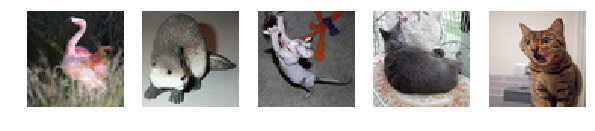

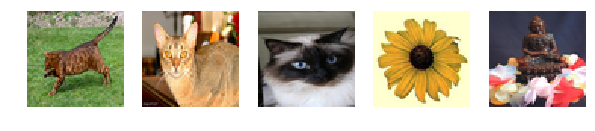

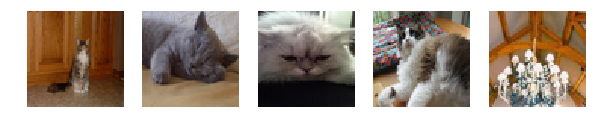

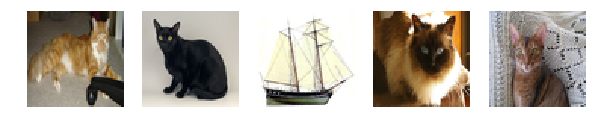

In [4]:
# Examine the data used for training the model
imageData = path.join("datasets", "imageData500_64pixels.hdf5")
validateArchive(imageData)

## Extract images from archive

One of the nice things about Keras is we can utilize `datagen.flow_from_directory` to have our dataset images loaded and labeled automaticly.  This means we don't need to work with the HDF5 archive as we have in previous write-ups.  What we do need to do; however, is write the images to disk, so that this write-up uses the same data as previous write-ups.

There is a quick script to do that here:  [ExtractImagesFromHDF5.ipynb](./ExtractImagesFromHDF5.ipynb)

In [5]:
# Define the image shapes
imgWidth, imgHeight = 64, 64
inputShape = (imgWidth, imgHeight, 3)

## Build and compile the model

In [6]:
# Create a sequential model object
model = Sequential()

# **First conv layer**
model.add(Conv2D(32, (3, 3), padding='same', input_shape=inputShape))
model.add(Activation('relu'))
# Max pool
model.add(MaxPooling2D(pool_size=(2, 2)))

# **Second conv layer**
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
# Max pool
model.add(MaxPooling2D(pool_size=(2, 2)))

# **Third conv layer**
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
# Max pool
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten 
model.add(Flatten())

# Dense layer
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [7]:
# Compile the model utilizing Adam as per previous write-ups
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Model Summary

In [8]:
# Display model summar
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
__________

## Load the image data

This in my opinion is where we really get spoiled.  Keras allows us to build `ImageDataGenerator` objects that do all the hard work for us.  The `ImageDataGenerator` finds all the images in a given directory, loads them, creates the labels, performs image augmentation, and so on and so forth.  Compared to all the work we had to do to build our own image set from scratch this is a breeze.

In [9]:
from keras.preprocessing.image import ImageDataGenerator

# Here we get all spoiled with Keras' data augmentation abilities...
dataGenerator = ImageDataGenerator(
        rotation_range=40,       # Rotate up to 40 degrees
        width_shift_range=0.2,   # Shift width by max 20%
        height_shift_range=0.2,  # Shift height by max 20%
        rescale=1./255,          # Normalize
        shear_range=0.2,         # Cut away max 20% of the image
        zoom_range=0.2,          # Zoom in 20% max
        horizontal_flip=True,    # Flip image randomly
        fill_mode='nearest')     # Fill missing pixels with the nearest value

In [10]:
# Only normalize the validation set; no augmentations
validationDataGenerator = ImageDataGenerator(rescale=1./255)

In [11]:
# Only normalize the test set; no augmentations
testDataGenerator = ImageDataGenerator(rescale=1./255)

In [12]:
# Define mini-batch size
batchSize = 20

# Create training generator
trainGenerator = dataGenerator.flow_from_directory(
        './datasets/catData/train', 
        target_size=(64, 64),
        batch_size=batchSize,
        class_mode='binary')

Found 800 images belonging to 2 classes.


In [13]:
# Create validation generator
validationGenerator = validationDataGenerator.flow_from_directory(
        './datasets/catData/validation',
        target_size=(64, 64),
        batch_size=batchSize,
        class_mode='binary')

Found 100 images belonging to 2 classes.


In [14]:
# Create test generator
testGenerator = testDataGenerator.flow_from_directory(
        './datasets/catData/test',
        target_size=(64, 64),
        batch_size=1,
        shuffle=False,
        class_mode='binary')

Found 100 images belonging to 2 classes.


## Train the model

In [15]:
# Do all the hard work of training the model using the training data
history = model.fit_generator(
        trainGenerator,
        steps_per_epoch=6000 // batchSize,
        epochs=3,
        validation_data=validationGenerator,
        validation_steps=1000 // batchSize
)

Epoch 1/3
300/300 [==============================] - 171s 570ms/step - loss: 0.6669 - acc: 0.5915 - val_loss: 0.6381 - val_acc: 0.6300
Epoch 2/3
300/300 [==============================] - 169s 564ms/step - loss: 0.5766 - acc: 0.7040 - val_loss: 0.5735 - val_acc: 0.7200
Epoch 3/3
300/300 [==============================] - 176s 588ms/step - loss: 0.5263 - acc: 0.7408 - val_loss: 0.5044 - val_acc: 0.7500


## Examine the training results

Let's examine how the model's accuracy improved as we trained it:

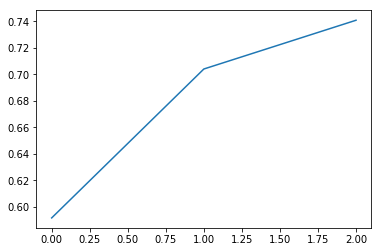

In [16]:
plt.plot(history.history['acc'])

<br><br>
And how about the cost:

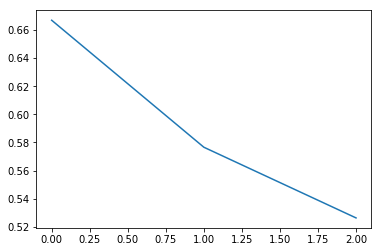

In [17]:
plt.plot(history.history['loss'])

<br><br>
The final accuracy rate on the training data set:

In [18]:
model.evaluate_generator(generator=validationGenerator)

[0.5043521165847779, 0.75]

75% may seem a little low, but what really matters is how the model performs against the test set in the next sections.  We actually want our model to be somewhat fuzzy on the training data, because that means that hopefully it isn't over fitting during training.

## Make predictions and gauge test set accuracy

In [19]:
# Reset the test generator in case we want to run it multiple times
testGenerator.reset()

# Run the test data through the forward propogation of the model
pred=model.predict_generator(testGenerator,verbose=1)

100/100 [==============================] - 1s 5ms/step


In [20]:
# Output results
model.evaluate_generator(generator=testGenerator)

[0.3789991675829515, 0.86]

86%!  Definitely the best results we so far throughout this series of write-ups.

Let's examine the predictions and misclassifications:

## Examine misclassifications

In [21]:
# Print predicted vs actual labels
predicted_class_indices = np.zeros(len(pred), dtype=int)
predicted_class_indices[np.squeeze(pred > 0.5)] = 1
print("Predicted labels:  ", predicted_class_indices)
print("Actual labels   :  ", testGenerator.classes)

Predicted labels:   [1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Actual labels   :   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [22]:
# Examine the classification labels assigned by Keras
classIndicesRev = {v:k for k,v in trainGenerator.class_indices.items()}
print(classIndicesRev)

{0: 'cat', 1: 'obj'}


In [23]:
# Sanity check
assert(len(predicted_class_indices) == len(testGenerator.classes))

# Create the labels for the images we'll plot below
wrong = []
labels = []

for i, val in enumerate(predicted_class_indices):
    if (predicted_class_indices[i] != testGenerator.classes[i]):
        wrong.append('.\\datasets\\catData\\test\\' + testGenerator.filenames[i])
        txt = "{}{}".format("Predicted: ", classIndicesRev[predicted_class_indices[i]])
        txt = "{}{}{}".format(txt, "\nActual: ", classIndicesRev[testGenerator.classes[i]])
        txt = "{}{}{}".format(txt, "\nImage file: ", testGenerator.filenames[i])
        labels.append(txt)   

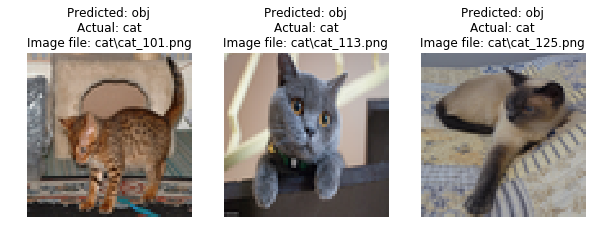

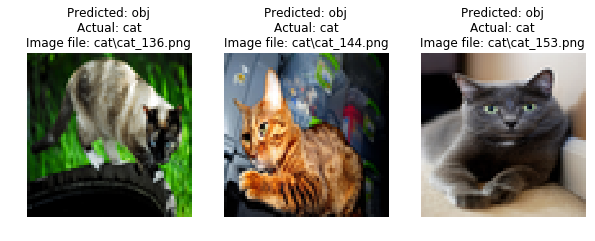

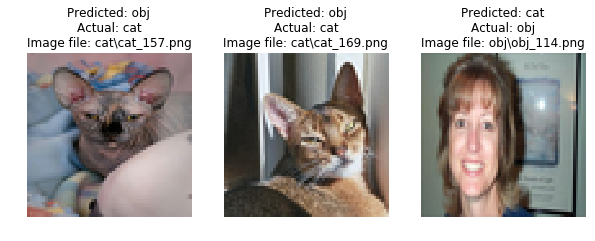

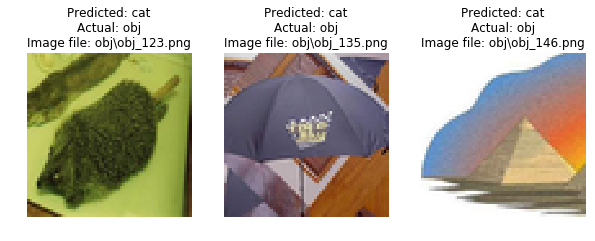

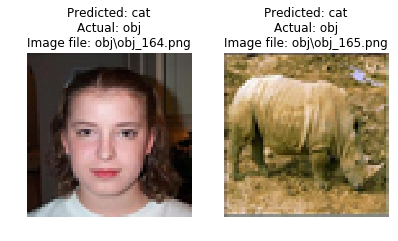

In [24]:
# Examine the missclassified images
images = []

for i, img in enumerate(wrong):
    img = mpimg.imread(img)
    images.append(img)

grid_display(images, labels, 3, (10,10))

Some of these make sense, and maybe others not so much...   ;)